# 1) IMPORT & INSTALL PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# 2) DATA UNDERSTANDING

## 2.1) Load Data

In [72]:
# Import from

path = "input/"
df_train = pd.read_csv(path+"churn_data_train.csv",encoding='latin-1')
df_test = pd.read_csv(path+"churn_data_test.csv",encoding='latin-1')

## 2.2) Data Exploration

In [73]:
df_train.shape, df_test.shape

((4577, 21), (2466, 20))

In [74]:
df_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,...,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,...,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,...,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,...,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.3,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,...,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,...,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [75]:
df_test.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal
0,ID03436,Masculino,0.0,No,No,1.0,Si,No,DSL,Si,No,No,No,No,No,Mes a mes,No,Checke por correo,47.95,47.95
1,ID05166,Femenino,0.0,Si,Si,62.0,Si,Si,Fibra Optica,No,Si,Si,Si,Si,Si,Anual,Si,Checke por correo,110.80,6840.95
2,ID04004,Femenino,0.0,Si,No,7.0,Si,No,Fibra Optica,No,No,Si,No,Si,No,Mes a mes,Si,Checke por correo,86.25,587.1
3,ID05309,Femenino,1.0,Si,No,50.0,Si,Si,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Anual,No,Checke por correo,25.20,1306.3
4,ID05434,Masculino,0.0,Si,Si,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,NaN,19.2


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 21 columns):
ID                        4577 non-null object
Sexo                      4577 non-null object
AdultoMayor               4503 non-null float64
Socio                     4548 non-null object
Dependientes              4577 non-null object
MesesCliente              4573 non-null float64
ServicioTelefonico        4577 non-null object
LineasMultiples           4577 non-null object
ServicioInternet          4577 non-null object
SeguridadOnline           4483 non-null object
RespaldoOnline            4483 non-null object
ProteccionDispositivo     4483 non-null object
SoporteTecnico            4483 non-null object
TransmisionTV             4483 non-null object
TransmisionPeliculas      4483 non-null object
TerminoContrato           4577 non-null object
FacturacionElectronica    4531 non-null object
MetodoPago                4577 non-null object
MontoCargadoMes           4163 non-null float

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 20 columns):
ID                        2466 non-null object
Sexo                      2466 non-null object
AdultoMayor               2414 non-null float64
Socio                     2447 non-null object
Dependientes              2466 non-null object
MesesCliente              2459 non-null float64
ServicioTelefonico        2466 non-null object
LineasMultiples           2466 non-null object
ServicioInternet          2466 non-null object
SeguridadOnline           2404 non-null object
RespaldoOnline            2404 non-null object
ProteccionDispositivo     2404 non-null object
SoporteTecnico            2404 non-null object
TransmisionTV             2404 non-null object
TransmisionPeliculas      2404 non-null object
TerminoContrato           2466 non-null object
FacturacionElectronica    2442 non-null object
MetodoPago                2466 non-null object
MontoCargadoMes           2267 non-null float

In [78]:
# Defining features types
ID = 'ID'
TARGET = 'Churn'

In [79]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    3362
1    1215
Name: Churn, dtype: int64

In [80]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.454228
1    26.545772
Name: Churn, dtype: float64

In [81]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica

In [92]:
# Arreglando valores " " en esta columna
df_train.MontoCargadoTotal= df_train.MontoCargadoTotal.replace(" ",0)
df_train.MontoCargadoTotal = df_train.MontoCargadoTotal.astype(float)

df_test.MontoCargadoTotal= df_test.MontoCargadoTotal.replace(" ",0)
df_test.MontoCargadoTotal = df_test.MontoCargadoTotal.astype(float)

In [93]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4577,4577,ID03537,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,4577,2,Masculino,2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,4503,NaN,NaN,NaN,0.154342,0.361316,0,0,0,0,1
Socio,4548,2,No,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,4577,2,No,3216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,4573,NaN,NaN,NaN,32.4083,24.6555,1,9,29,56,72
ServicioTelefonico,4577,2,Si,4118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,4577,3,No,2205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,4577,3,Fibra Optica,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,4483,3,No,2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2466,2466,ID04188,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,2466,2,Femenino,1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,2414,NaN,NaN,NaN,0.159901,0.36659,0,0,0,0,1
Socio,2447,2,No,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,2466,2,No,1717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,2459,NaN,NaN,NaN,32.4469,24.344,1,9,29,55,72
ServicioTelefonico,2466,2,Si,2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,2466,3,No,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,2466,3,Fibra Optica,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,2404,3,No,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica

## 2.3) Evaluate missings

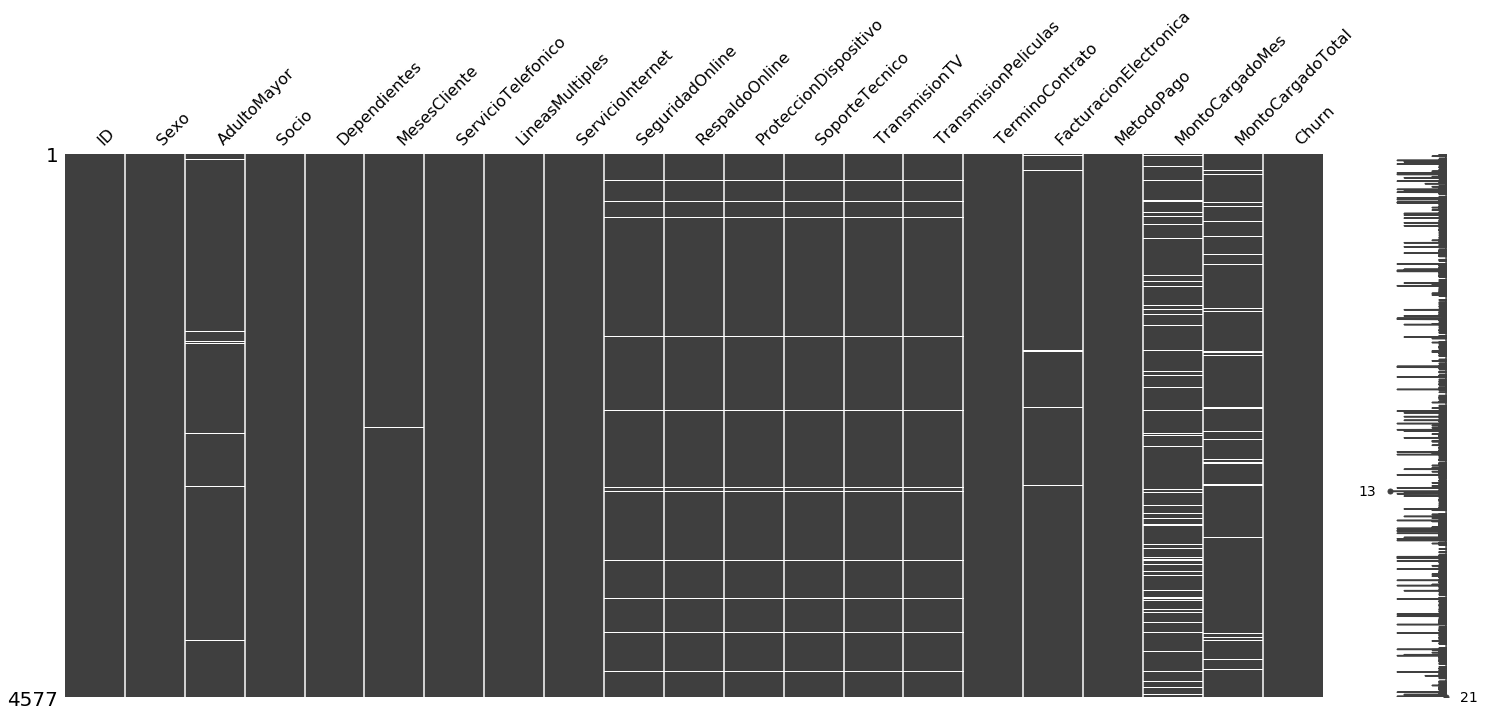

In [88]:
import missingno as msno
msno.matrix(df_train)

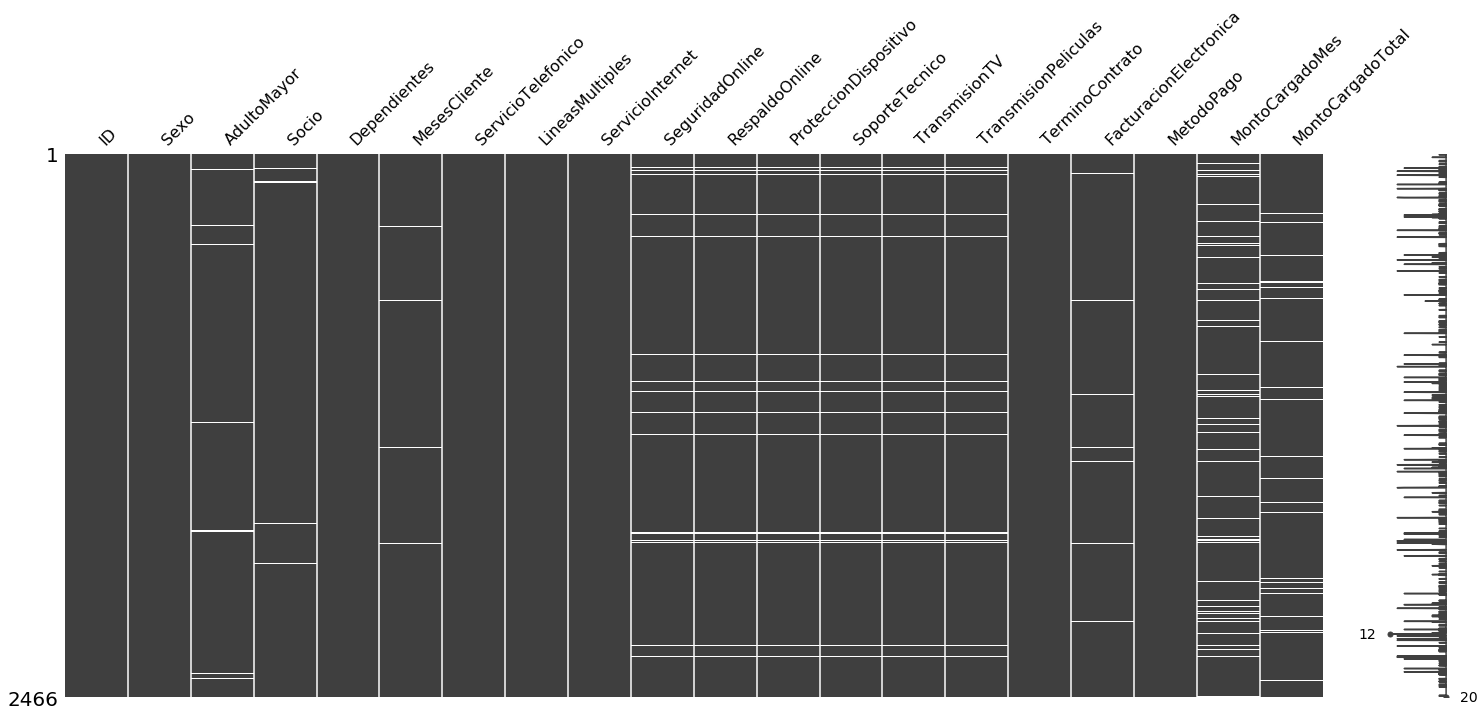

In [89]:
msno.matrix(df_test)

In [ ]:
# No hay outliers

# 3) DATA PREPARATION

In [90]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

ds_test = df_test.copy()

## 3.1) Impute missings

In [95]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

#Socio (imputacion por MODA)
ds_test["Socio"].fillna("No",inplace = True)

# MesesCliente (imputacion por MEDIA)
ds_train["MesesCliente"].fillna(32, inplace = True)
ds_test["MesesCliente"].fillna(32, inplace = True)

#SeguridadOnline (imputacion por MODA)
ds_train["SeguridadOnline"].fillna("No", inplace = True)
ds_test["SeguridadOnline"].fillna("No", inplace = True)

#RespaldoOnline (imputacion por MODA)
ds_train["RespaldoOnline"].fillna("No", inplace = True)
ds_test["RespaldoOnline"].fillna("No", inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# TransmisionTV (imputacion por MODA)
ds_train["TransmisionTV"].fillna('No', inplace = True)
ds_test["TransmisionTV"].fillna('No', inplace = True)

# TransmisionPeliculas (imputacion por MODA)
ds_train["TransmisionPeliculas"].fillna('No', inplace = True)
ds_test["TransmisionPeliculas"].fillna('No', inplace = True)

# TerminoContrato (imputacion por MODA)
ds_train["TerminoContrato"].fillna('Mes a mes', inplace = True)
ds_test["TerminoContrato"].fillna('Mes a mes', inplace = True)

# FacturacionElectronica (imputacion por MODA)
ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

# MetodoPago (imputacion por MODA)
ds_train["MetodoPago"].fillna('Checke por correo', inplace = True)
ds_test["MetodoPago"].fillna('Checke por correo', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
ds_test["MontoCargadoMes"].fillna(69.7, inplace = True)

# MontoCargadoTotal (imputacion por MEDIA)
ds_train["MontoCargadoTotal"].fillna(1987.4, inplace = True)
ds_test["MontoCargadoTotal"].fillna(2045.97, inplace = True)


## 3.2) Data Transformation

In [ ]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

# LineasMultiples 
dicc_lin_mult = {'Si': 2, 'No':1, 'Sin servicio telefonico':0 }
ds_train["LineasMultiples"] = ds_train["LineasMultiples"].map(dicc_lin_mult)
ds_test["LineasMultiples"] = ds_test["LineasMultiples"].map(dicc_lin_mult)

# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

# Crear Features Dummies
ds_train.loc[ds_train['ProteccionDispositivo']=='Sin servicio de internet', 'ProteccionDispositivo'] = 'SinServInter'
ds_train.loc[ds_train['SoporteTecnico']=='Sin servicio de internet', 'SoporteTecnico'] = 'SinServInter'

ds_test.loc[ds_test['ProteccionDispositivo']=='Sin servicio de internet', 'ProteccionDispositivo'] = 'SinServInter'
ds_test.loc[ds_test['SoporteTecnico']=='Sin servicio de internet', 'SoporteTecnico'] = 'SinServInter'

ds_train = pd.get_dummies(ds_train, columns=['ProteccionDispositivo','SoporteTecnico'])
ds_test = pd.get_dummies(ds_test, columns=['ProteccionDispositivo','SoporteTecnico'])